# Free Response of a Single Degree of Freedom System

In [1]:
# The following two lines will cause vtoolbox.py to be reloaded automatically if edited
# This is helpful in development
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import vtoolbox as vtb

In [13]:
help(vtb.solve_sdofs)

Help on function solve_sdofs in module vtoolbox:

solve_sdofs(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)
    returns t, x, v
    $lpha$
    Returns free response of a second order linear ordinary differential equation
    defined by 
    :math:`m\ddot{x} + c \dot{x} + k x = 0`
    given initial conditions :math:`x_0` and :math:`\dot{x}_0 = v_0` for
    :math:`0 < t < t_{max}` 
    
    Parameters
    
    m, c, k:           1) Floats. Mass, damping and stiffness.
    x0, v0:            2) Floats. Initial conditions
    max_time:          3) Float. end time or response to be returned
    
    Returns
    
    t, x, v: 1) Arrays. Time, displacement, and velocity
    
    :Example:
    >>> import vtoolbox as vtb
    >>> vtb.solve_sdofs()
    (array([  0.00000000e+00,   4.00160064e-03,   8.00320128e-03, ...,
             9.99199680e+00,   9.99599840e+00,   1.00000000e+01]), array([[ 1.        ],
           [ 0.99591926],
           [ 0.9916807 ],
           ..., 
           [ 0.56502396]

In this Notebook we investigate the impact of various parameters on the response of a single mass-damper-spring system. 

$$
m\ddot{x} +c\dot{x}+kx=0
$$

Here m, c, and k are the mass, damping, and stiffness in consistent units. 

## Computing the trajectories and plotting the result

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

In [4]:
t, x, y = vtb.solve_sdofs(max_time = 30)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

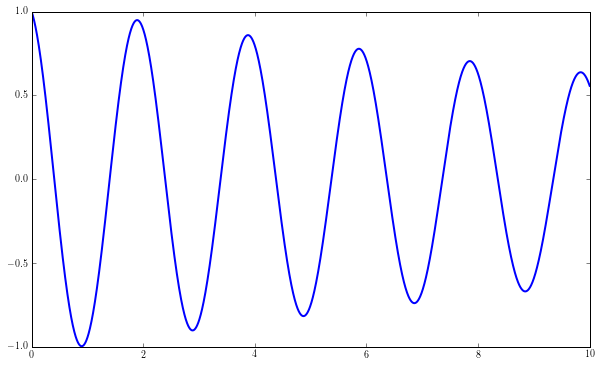

In [5]:
vtb.sdof_time_plot(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)

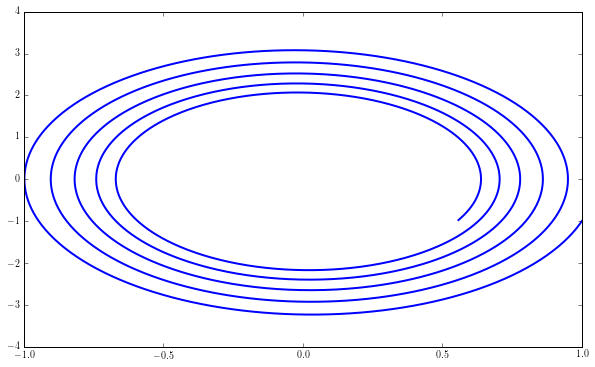

In [6]:
vtb.sdof_phase_plot(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)

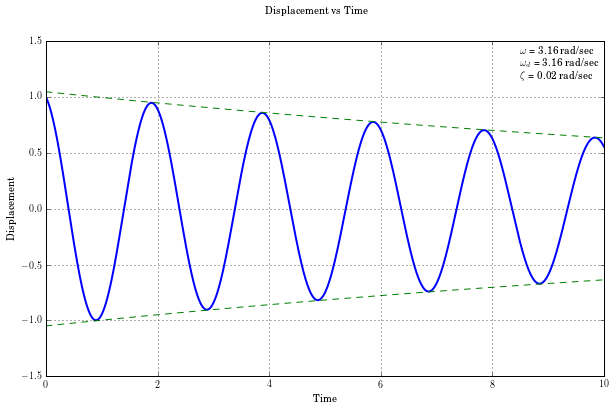

In [75]:
vtb.sdof_time_plot_i()

The natural frequency is  3.16227766017 rad/s.
The damping ratio is  0.0158113883008
The damped natural frequency is  3.16188235075


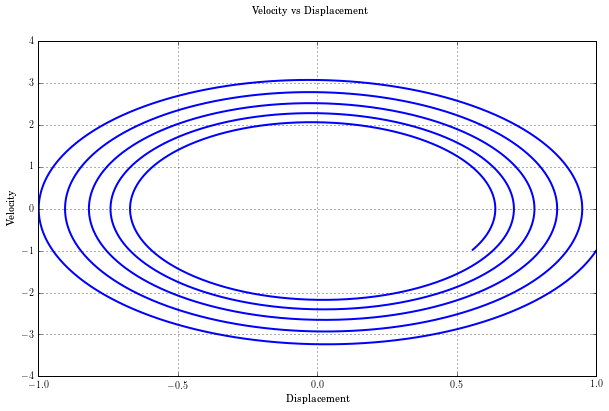

In [17]:
vtb.sdof_phase_plot_i()

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$.

In [9]:
xyz_avg = z_t.mean(axis=1)

NameError: name 'z_t' is not defined

In [ ]:
xyz_avg.shape

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

In [ ]:
def vtb2_5(m=1,m0=.1,e=0.01,z=0.1,rmin=0.2,rmax=2):
    r=sp.arange(rmin,rmax,(rmax - rmin) / 1000)
    Xn=((r ** 4) / ((1 - r ** 2) ** 2 + (2 * z * r) ** 2))**0.5
    X=Xn * m0 * e / m
    phi=sp.arctan2(2 * z * r,1 - r ** 2)
    fig = plt.figure()
    fig.subplots_adjust(wspace = .4)
    plt.subplot(1,2,1)
    plt.plot(r,Xn,'-')
    plt.grid('on')
    plt.xlabel('Frequency Ratio')
    plt.ylabel('Normalized Displacement Magnitude')
    plt.title('Normalized Displacement Magnitude')

    plt.subplot(1,2,2)
    plt.plot(r,phi,'-')
    plt.grid('on')
    plt.xlabel('Frequency Ratio')
    plt.ylabel('Phase')
    plt.title('Phase')

    return

In [ ]:
vtb2_5()


In [ ]:
help(plt.subplot)

In [ ]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$')